In [1]:
from scipy.spatial import cKDTree
from shapely.geometry import box, LineString, Point, MultiPoint
from zipfile import ZipFile
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd
import requests
import sys

In [3]:
CRS_LATLON = 'EPSG:4326'
CRS_NYC = 'EPSG:2263'
DATA_DIR = '../data'

In [4]:
url = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyclion_21d.zip'

with open(f'{DATA_DIR}/lion/nyclion_21d.zip', 'wb') as file:
    file.write(requests.get(url).content)

In [7]:
with ZipFile(f'{DATA_DIR}/lion/nyclion_21d.zip', 'r') as file:
    file.printdir()
    file.extractall(f'{DATA_DIR}/')

File Name                                             Modified             Size
lion/lion.gdb/a00000001.freelist               2021-11-05 15:20:14         4440
lion/lion.gdb/a00000001.gdbindexes             2021-11-05 15:11:10          110
lion/lion.gdb/a00000001.gdbtable               2021-11-05 15:20:14          385
lion/lion.gdb/a00000001.gdbtablx               2021-11-05 15:20:14         5152
lion/lion.gdb/a00000001.TablesByName.atx       2021-11-05 15:20:14         4118
lion/lion.gdb/a00000002.gdbtable               2021-11-05 15:11:10         2055
lion/lion.gdb/a00000002.gdbtablx               2021-11-05 15:11:10         5152
lion/lion.gdb/a00000003.gdbindexes             2021-11-05 15:11:10           42
lion/lion.gdb/a00000003.gdbtable               2021-11-05 15:13:18         1825
lion/lion.gdb/a00000003.gdbtablx               2021-11-05 15:13:18         5152
lion/lion.gdb/a00000004.CatItemsByPhysicalName.atx 2021-11-05 15:20:14         4118
lion/lion.gdb/a00000004.CatItemsByTy

In [8]:
lion_gdf = gpd.read_file(f'{DATA_DIR}/lion/lion.gdb', driver='FileGDB', layer='lion')

In [9]:
lion_gdf.to_file(f'{DATA_DIR}/geo/lion.shp')

/home/chriscarey/miniconda3/envs/mlc/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


KeyboardInterrupt: 

In [ ]:
nyc_cb_gdf = gpd.read_file(f'{DATA_DIR}/geo/nyc_citibike.geojson', crs=CRS_NYC)
nyc_cb_gdf = nyc_cb_gdf.to_crs(CRS_LATLON)
nyc_cb_gdf.plot()

<AxesSubplot:>

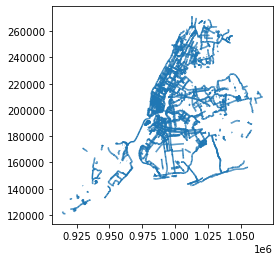

In [21]:
lion_gdf[lion_gdf['BikeLane'].str.strip() != '']